# pivpy example

In [169]:
import os, sys
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [155]:
sys.path.append('../../')

In [156]:
from pivpy import io, graphics

In [157]:
filename = '../data/Run000001.T000.D000.P000.H001.L.vec'

variables, units, rows, cols = io.parse_header(filename)
data = io.loadvec(filename,rows,cols)

In [158]:
data.dtype, data.shape

(dtype([('x', '<f4'), ('y', '<f4'), ('u', '<f4'), ('v', '<f4')]), (63, 63))

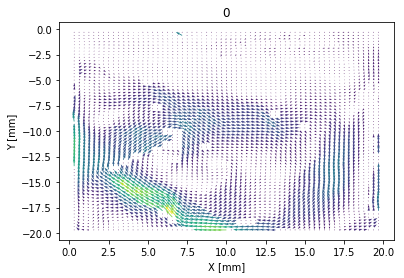

In [159]:
graphics.showf(data,var=variables,units=units)

In [232]:
d = np.loadtxt(filename,skiprows=1,delimiter=',',usecols=(0,1,2,3,4)).reshape(rows,cols,5)

In [239]:
u = xr.DataArray(d[:,:,2],dims=('x','y'),coords={'x':d[:,:,0][0,:],'y':d[:,:,1][:,0]})
v = xr.DataArray(d[:,:,3],dims=('x','y'),coords={'x':d[:,:,0][0,:],'y':d[:,:,1][:,0]})
cnc = xr.DataArray(d[:,:,4],dims=('x','y'),coords={'x':d[:,:,0][0,:],'y':d[:,:,1][:,0]})
data = xr.Dataset({'u': u, 'v': v,'cnc':cnc})           

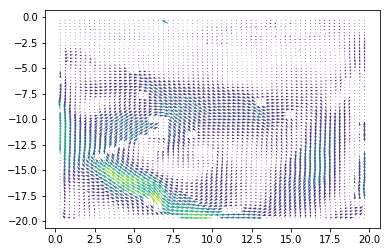

In [243]:
plt.figure()
plt.quiver(data.x,data.y,data.u,data.v,data.u**2 + data.v**2)

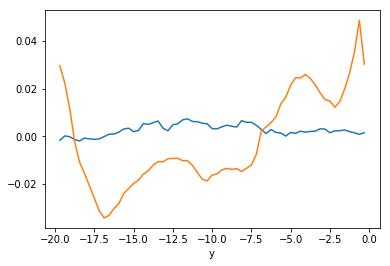

In [274]:
# profile along y
data.mean(dim='x').to_dataframe()['u'].plot()
data.mean(dim='x').to_dataframe()['v'].plot()